In [ ]:
from google.colab import files
uploaded = files.upload()


Saving animal_dataset.zip to animal_dataset.zip


In [ ]:
import zipfile
zip_filename = 'animal_dataset.zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()
    print("Extraction complete!")


Extraction complete!


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
data_folder = "animal_dataset"

class_names = ["cat", "dog", "panda"]

images = []
labels = []

print("Loading images...")

for class_id, folder_name in enumerate(class_names):
    folder_path = os.path.join(data_folder, folder_name)
    print(f"Loading from: {folder_path}")

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg')):
            img_path = os.path.join(folder_path, filename)


            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))


            img_flat = img.flatten()

            images.append(img_flat)
            labels.append(class_id)


X = np.array(images)
y = np.array(labels)

print(f"\nDone! Loaded {len(X)} images")
print(f"Each image size: {X.shape[1]} pixels")
print(f"Classes: {class_names}")

Loading images...
Loading from: animal_dataset/cat
Loading from: animal_dataset/dog
Loading from: animal_dataset/panda

Done! Loaded 300 images
Each image size: 1024 pixels
Classes: ['cat', 'dog', 'panda']


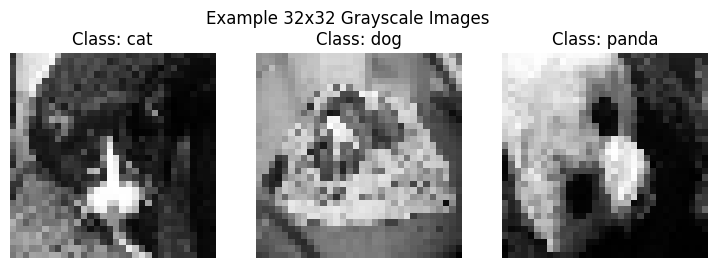

In [ ]:
plt.figure(figsize=(9, 3))

for i in range(3):
    idx = np.where(y == i)[0][0]

    plt.subplot(1, 3, i+1)
    plt.imshow(X[idx].reshape(32, 32), cmap='gray')
    plt.title(f"Class: {class_names[i]}")
    plt.axis('off')

plt.suptitle("Example 32x32 Grayscale Images")
plt.show()

In [ ]:
k_values = list(range(1, 22, 2))
print("We will test these K values:", k_values)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("5-fold cross validation ready!")

We will test these K values: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
5-fold cross validation ready!


In [ ]:
print("Starting 5-fold cross validation... Please wait...\n")

l1_accuracies = []
l2_accuracies = []

for k in k_values:
    fold_acc_l1 = []
    fold_acc_l2 = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]


        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l1.fit(X_train, y_train)
        pred_l1 = knn_l1.predict(X_val)
        acc_l1 = accuracy_score(y_val, pred_l1)
        fold_acc_l1.append(acc_l1)


        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_l2.fit(X_train, y_train)
        pred_l2 = knn_l2.predict(X_val)
        acc_l2 = accuracy_score(y_val, pred_l2)
        fold_acc_l2.append(acc_l2)

    avg_l1 = np.mean(fold_acc_l1)
    avg_l2 = np.mean(fold_acc_l2)

    l1_accuracies.append(avg_l1)
    l2_accuracies.append(avg_l2)

    print(f"K = {k:2d} → Manhattan: {avg_l1:.4f} | Euclidean: {avg_l2:.4f}")

print("\nCross-validation finished!")

Starting 5-fold cross validation... Please wait...

K =  1 → Manhattan: 0.3867 | Euclidean: 0.3333
K =  3 → Manhattan: 0.3833 | Euclidean: 0.3633
K =  5 → Manhattan: 0.3967 | Euclidean: 0.3400
K =  7 → Manhattan: 0.4100 | Euclidean: 0.3867
K =  9 → Manhattan: 0.4200 | Euclidean: 0.4067
K = 11 → Manhattan: 0.4067 | Euclidean: 0.3600
K = 13 → Manhattan: 0.4233 | Euclidean: 0.3700
K = 15 → Manhattan: 0.4100 | Euclidean: 0.3933
K = 17 → Manhattan: 0.4267 | Euclidean: 0.4033
K = 19 → Manhattan: 0.4300 | Euclidean: 0.3933
K = 21 → Manhattan: 0.4200 | Euclidean: 0.3733

Cross-validation finished!


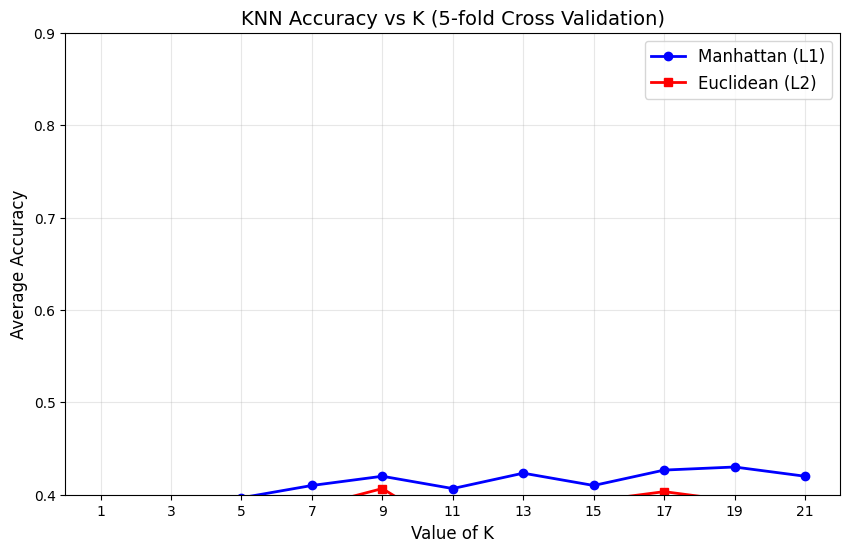

Best Manhattan → K=19, Accuracy=0.4300
Best Euclidean → K=9, Accuracy=0.4067


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, l1_accuracies, marker='o', label='Manhattan (L1)', color='blue', linewidth=2)
plt.plot(k_values, l2_accuracies, marker='s', label='Euclidean (L2)', color='red', linewidth=2)

plt.title('KNN Accuracy vs K (5-fold Cross Validation)', fontsize=14)
plt.xlabel('Value of K', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.ylim(0.4, 0.9)
plt.show()


best_k_l1 = k_values[np.argmax(l1_accuracies)]
best_acc_l1 = max(l1_accuracies)
best_k_l2 = k_values[np.argmax(l2_accuracies)]
best_acc_l2 = max(l2_accuracies)

print(f"Best Manhattan → K={best_k_l1}, Accuracy={best_acc_l1:.4f}")
print(f"Best Euclidean → K={best_k_l2}, Accuracy={best_acc_l2:.4f}")

In [ ]:
if best_acc_l1 > best_acc_l2:
    final_k = best_k_l1
    final_metric = 'manhattan'
    print("Manhattan (L1) distance is better for this dataset")
else:
    final_k = best_k_l2
    final_metric = 'euclidean'
    print("Euclidean (L2) distance is better for this dataset")


final_model = KNeighborsClassifier(n_neighbors=final_k, metric=final_metric)
final_model.fit(X, y)

print(f"Final model trained with K={final_k} and {final_metric} distance")

Manhattan (L1) distance is better for this dataset
Final model trained with K=19 and manhattan distance



TOP 5 PREDICTIONS

Prediction 1:
   True class     : panda
   Predicted class: panda
   Correct?       : Yes


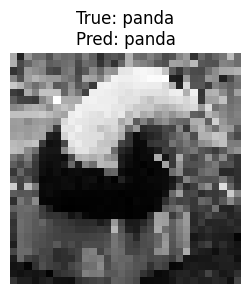


Prediction 2:
   True class     : panda
   Predicted class: cat
   Correct?       : No


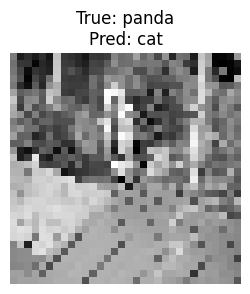


Prediction 3:
   True class     : dog
   Predicted class: cat
   Correct?       : No


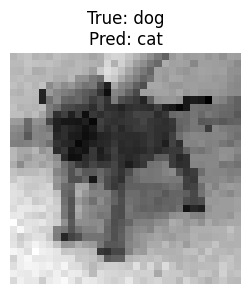


Prediction 4:
   True class     : cat
   Predicted class: dog
   Correct?       : No


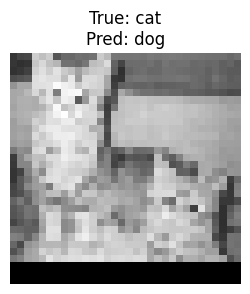


Prediction 5:
   True class     : panda
   Predicted class: panda
   Correct?       : Yes


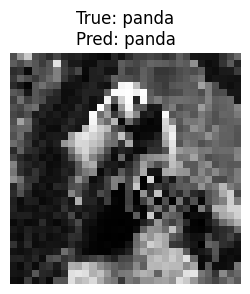

In [ ]:
print("\n" + "="*60)
print("TOP 5 PREDICTIONS")
print("="*60)

np.random.seed(42)
test_indices = np.random.choice(len(X), 5, replace=False)

for i, idx in enumerate(test_indices):
    test_img = X[idx].reshape(1, -1)
    true_label = class_names[y[idx]]
    pred_label = class_names[final_model.predict(test_img)[0]]

    print(f"\nPrediction {i+1}:")
    print(f"   True class     : {true_label}")
    print(f"   Predicted class: {pred_label}")
    print(f"   Correct?       : {'Yes' if true_label == pred_label else 'No'}")

    plt.figure(figsize=(3,3))
    plt.imshow(X[idx].reshape(32,32), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
    plt.axis('off')
    plt.show()